In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic_2d
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1

In [2]:

os.chdir('/Users/nitya/Work/Data/Project1/measurements')
file2 = open(r'SFRP.pkl', 'rb')
d = pickle.load(file2, encoding = 'latin')
file2.close()
np.shape(d)

(75476,)

In [6]:
#Getting colors, kcorrect, fluxes
# There's one annoying 0 thing in N band nmgy_ivar - removing it!
indf = np.where(np.asarray(d['NMGY_IVAR'])[:,1]>0)[0]

d = np.asarray(d[indf])
ind = d['NSAID']
z = d['Z']
mtol = d['MTOL']
kc = d['KCORRECT']
mass = d['MASS']
opt = [d['ABSMAG'][:,1][i]-d['ABSMAG'][:,4][i] for i in range(len(ind))]
inf = [d['W1MAG'][i]-d['W3MAG'][i] for i in range(len(ind))]
#optical fluxes and flux errors
opt_flux = d['NMGY']
opt_flerr = d['NMGY_IVAR']
#WISE fluxes in nanomaggies
inf_flux = np.column_stack((d['W1_NMGY'],d['W2_NMGY'],d['W3_NMGY'],d['W4_NMGY']))
inf_flerr = np.column_stack((d['W1SIGM_NMGY'],d['W2SIGM_NMGY'],d['W3SIGM_NMGY'],d['W4SIGM_NMGY']))


In [8]:
def jansky(a,b):
    ma = a*3631*(10.0**(-9.0))*(10**(b/(-2.5)))
    return ma
jansky = np.vectorize(jansky)
def jansky_err(a,b):
    ma_err = (a**(-0.5))*3631*(10.0**(-9.0))*(10**(b/(-2.5)))
    return ma_err
jansky_err = np.vectorize(jansky_err)
def wjansky(a):
    ma = 3631*(10**(-9.0))*a
    return ma
wjansky =  np.vectorize(wjansky)



print(np.shape(opt_flux), np.shape(kc))
flux = jansky(opt_flux,kc)
flerr = jansky_err(opt_flerr,kc)
wflux = wjansky(inf_flux)
wflerr = wjansky(inf_flerr)



(75475, 7) (75475, 7)


[0.04035187 0.33866848 0.63698509 0.9353017  1.23361832 1.53193493
 1.83025154 2.12856815 2.42688477 2.72520138 3.02351799 3.3218346
 3.62015121 3.91846783 4.21678444 4.51510105 4.81341766 5.11173428
 5.41005089 5.7083675  6.00668411 6.30500072 6.60331734 6.90163395
 7.19995056 7.49826717]
[-2.99099922 -2.75259926 -2.5141993  -2.27579933 -2.03739937 -1.7989994
 -1.56059944 -1.32219948 -1.08379951 -0.84539955 -0.60699959 -0.36859962
 -0.13019966  0.1082003   0.34660027  0.58500023  0.82340019  1.06180016
  1.30020012  1.53860008  1.77700005  2.01540001  2.25379997  2.49219994
  2.7305999   2.96899986]
0.29831661224365236
0.23839996337890623


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


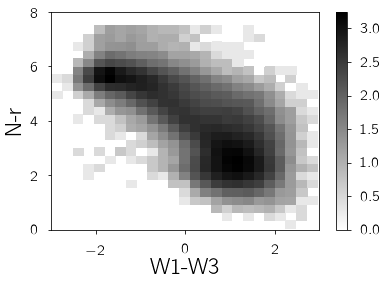

In [10]:
h = binned_statistic_2d(inf,opt,ind,statistic = 'count',bins = (25,25))

yedges = h[1]
xedges = h[2]

print(xedges)
print(yedges)

print(xedges[2]-xedges[1])
print(yedges[2]-yedges[1])

xbins = [0.5*(h[1][i] + h[1][i+1]) for i in range(25)]
ybins = [0.5*(h[2][i] + h[2][i+1]) for i in range(25)]
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
number = np.ma.array(h[0], mask = h[0] == 0)
number = np.log10(number)

plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.binary)
plt.colorbar()
# plt.xlim(0,0.056)
# plt.ylim(min(gr),max(gr))
plt.ylim(0,8.0)
plt.xlim(-3.0,3.0)
plt.xlabel('W1-W3')
plt.ylabel('N-r')
plt.show()

In [115]:
woo = np.asarray(np.ravel(h[0]))
test = np.where(woo>0)[0]
print len(woo[test])
# re-ordering things so we have flux, fluxerr, flux, fluxerr and so on till all 11 filters are covered
a = np.column_stack((flux[:,0], flerr[:,0], flux[:,1], flerr[:,1], flux[:,2], flerr[:,2], flux[:,3], flerr[:,3], flux[:,4], flerr[:,4], flux[:,5], flerr[:,5], flux[:,6], flerr[:,6], wflux[:,0], wflerr[:,0], wflux[:,1], wflerr[:,1], wflux[:,2], wflerr[:,2], wflux[:,3], wflerr[:,3]))
print np.shape(a)

#set r-band fluxes to 1...
r_flux = a[:,8]
new_a = np.asarray([[a[i][j]/r_flux[i] for j in range(22)] for i in range(len(a))])

467


In [122]:

new_a = np.column_stack((mass,lumz,rmtol))
print new_a[0:10]

#Averaging over the bins;
#Match bin number to corresponding data row
b = np.reshape(np.asarray(h[3]),(len(ind),1))
f = np.append(new_a,b, axis = 1)

#Sort according to bin number
f = f[f[:,3].argsort()]
print f[0:10]
#get unique bin numbers
bins = np.unique(f[:,3])
#number in each bin;
n = [np.where(f[:,3] == bins[i]) for i in range(len(bins))]
#averaging fluxes in each of the bins
h = np.array([np.mean(f[n[i]], axis = 0) for i in range(len(bins))])
print h[0:10]
print np.shape(h)

#Sanity check: Rband values should be 1


[[  8.81539482e+09   4.99273236e+09   1.74035871e+00]
 [  1.70285722e+10   9.36637812e+09   1.64225233e+00]
 [  2.12651776e+09   1.94723002e+09   9.76315975e-01]
 [  6.05692928e+09   5.09440677e+09   1.18658912e+00]
 [  7.25714995e+09   3.08430805e+09   2.05719018e+00]
 [  6.35407718e+09   2.97240637e+09   2.07668400e+00]
 [  1.15024220e+10   6.63412423e+09   1.63362134e+00]
 [  9.07874918e+09   4.47350631e+09   1.77105439e+00]
 [  3.01139302e+09   2.42208345e+09   1.21927071e+00]
 [  1.37645650e+10   6.42852914e+09   2.05133224e+00]]
[[  6.78128947e+09   3.13335448e+09   2.01485157e+00   4.40000000e+01]
 [  5.77099930e+09   2.60946810e+09   1.94123471e+00   4.40000000e+01]
 [  3.47769856e+09   1.87183944e+09   1.71965134e+00   4.50000000e+01]
 [  8.07672371e+09   3.77815708e+09   1.96636593e+00   4.60000000e+01]
 [  5.03987814e+09   2.29562426e+09   2.12744260e+00   4.60000000e+01]
 [  1.38478612e+10   6.32148654e+09   1.98017001e+00   4.80000000e+01]
 [  7.39745331e+09   3.22727740e+

In [123]:
import pickle
# afile = open(r'mass_lumnsa_mtol_bin.pkl', 'wb')
# pickle.dump(h, afile)
# afile.close()
print np.shape(data)
data[250]
redshifts = np.zeros(len(bins))
print len(redshifts) 
print redshifts[0:10]


# stuff = np.column_stack((bins,redshifts,data))
# filename = 'magphys_input_file'
# f = open(filename,'w')
# for line in stuff:
#     f.write("  ".join(str(x) for x in line) + "\n")
# f.close()
bins

# Making a bin_number-colors file
t = np.column_stack((b,opt,inf))
t[0:25]

n1 = [np.where(t[:,0] == bins[i]) for i in range(len(bins))]
tnew = t[t[:,0].argsort()]
tnew =  np.array([np.mean(tnew[n[i]], axis = 0) for i in range(len(bins))])
print tnew[200:467]


import pickle
# afile = open(r'bin_opt_inf.pkl', 'wb')
# pickle.dump(tnew, afile)
# afile.close()

In [ ]:
#Random code lines that might be useful later;


# #Let's do rmtol check;

# rflux = d['RNMGY'][:,4]
# rkc = kc[:,4]

# odist = [d['ZDIST'][i]*3*(10**5)/100 for i in range(len(ind))]
# print odist[0:10]

# lumz = [4*3.14159*0.7*3*(10**15)*(odist[i]**2.0)*(3.087**2.0)*3631*(10**(32 + 12 - 26 -9))*rflux[i]*(10**((-rkc[i]+0.77)/2.5))/(6.1976*3.828*(10**26)) for i in range(len(ind))]

# # def lum(flux,z,kc):
# #     dist = WMAP7.comoving_distance(z).value
# #     ldist = (1+z)*dist
# #     lum = 4*3.14159*(ldist**2.0)*(3.087**2.0)*3631*(10**(32 + 12 - 26 -9))*flux
# #     return lum

# rmtol= mtol[:,4]
# # rlum = [lum(rflux[i],z[i],rkc[i]) for i in range(len(ind))]

# print mass[0:10]

# test = np.asarray([lumz[i]*rmtol[i] for i in range(len(ind))])

# print test[0:10]
# print mass[0:10]
